In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set_style("white")

### Brazil weather stations

In [2]:
# ## Reading the geo data
# geo_master = pd.read_csv('../WorldCityLocations/World_Cities_Location_table.csv', sep=';', header=None)
# del geo_master[0]
# geo_master.columns = ['country', 'state_city', 'lat', 'long', 'alt']


In [3]:
# geo_master.head(2)

In [4]:
# ## Countries with Zika
# ct = ['Argentina', 'Brazil', 'Colombi', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Mexico', 'Nicaragua', 'Panama', 'United States']
# ## No Dominican Republic, No US Virgin Islands
# ## Exluding France 

# # This transforms the elements of the first row to a list
# geo_master.ix[0].tolist()

# zika_geo = []
# for i in range(geo_master.shape[0]):
#     data = geo_master.ix[i]
#     if data[0] in ct:
#         zika_geo.append(data)
#     else:
#         pass

In [5]:
# ## Zika Geo Contaminaded countries
# zika_geo = pd.DataFrame(zika_geo).reset_index()
# zika_geo.head(2)

In [6]:
# #Renaming Colombia 
# zika_geo.country.replace("Colombi", "Colombia", inplace=True)
# zika_geo.country.value_counts()

### Brazil

In [7]:
# brazil_geo = zika_geo[zika_geo['country'].isin(['Brazil'])]
# brazil_geo.country.unique()

In [8]:
# ## None of the states are in the dataset
# brazil_geo = brazil_geo[brazil_geo['state_city'].isin(['Acre', 'Sao Paulo', 'Amazonas', 'Espirito Santo', 'Amapa',
#                                                       'Sergipe','Mato Grosso', 'Piaui', 'Santa Catarina', 'Parana',
#                                                       'Minas Gerais','Bahia', 'Pernambuco', 'Roraima','Ceara','Alagoas',
#                                                      'Maranhao', 'Mato Grosso do Sul', 'Rio Grande do Norte', 
#                                                        'Rio de Janeiro', 'Rio Grande do Sul', 'Rondonia', 'Paraiba',
#                                                       'Para', 'Tocantins', 'Distrito Federal','Goias'])]
# brazil_geo.state_city.unique()

### Geo Names 
http://www.geonames.org/export/

In [9]:
# brazil_master = pd.read_table('../geo_names/BR.txt', header=None)

In [10]:
# brazil_master.head(2)

### Bing

In [11]:
# from geopy.geocoders import Bing
# # location =
# geolocator  = Bing("AqbMqgChvhrcKHPnavY2dmbyTP9L7XQG1iKCnZ61KXFOwcZbMABDNlyNnFnYGJvY")
# location = geolocator.geocode("Goias Brazil")

In [12]:
from geopy.geocoders import Bing
states = ['Acre','Sao Paulo', 'Amazonas', 'Espirito Santo','Amapa','Sergipe','Mato Grosso', 'Piaui', 'Santa Catarina', 'Parana',
 'Minas Gerais','Bahia', 'Pernambuco', 'Roraima', 'Ceara', 'Alagoas', 'Maranhao', 'Mato Grosso do Sul','Rio Grande do Norte',
 'Rio de Janeiro','Rio Grande do Sul','Rondonia','Paraiba','Para','Tocantins','Distrito Federal','Goias']

locations = []

geolocator  = Bing("AqbMqgChvhrcKHPnavY2dmbyTP9L7XQG1iKCnZ61KXFOwcZbMABDNlyNnFnYGJvY")
for i in states:
    print i
    geocode = geolocator.geocode("%r Brazil" %i)
    locations.append([i, geocode[1][0], geocode[1][1]])
    #location.append(geolocator.geocode("%r Brazil" %i))
#     print location

Acre
Sao Paulo
Amazonas
Espirito Santo
Amapa
Sergipe
Mato Grosso
Piaui
Santa Catarina
Parana
Minas Gerais
Bahia
Pernambuco
Roraima
Ceara
Alagoas
Maranhao
Mato Grosso do Sul
Rio Grande do Norte
Rio de Janeiro
Rio Grande do Sul
Rondonia
Paraiba
Para
Tocantins
Distrito Federal
Goias


In [13]:
locations = np.array(locations)
locations = pd.DataFrame(locations, columns=['state_ct','latitude','longitude'])
locations.head()

,state_ct,latitude,longitude
0,Acre,-9.30872154236,-70.4464645386
1,Sao Paulo,-23.5628395081,-46.6546401978
2,Amazonas,-4.18510246277,-64.6991348267
3,Espirito Santo,-19.575138092,-40.6712493896
4,Amapa,1.4422930479,-51.9495849609


In [14]:
import cPickle

In [15]:
f = open('locations.save', 'wb')
cPickle.dump(locations,f)
f.close()

In [16]:
f = open('locations.save', 'rb')
locations = cPickle.load(f)
f.close()

In [17]:
print locations.state_ct.unique()

['Acre' 'Sao Paulo' 'Amazonas' 'Espirito Santo' 'Amapa' 'Sergipe'
 'Mato Grosso' 'Piaui' 'Santa Catarina' 'Parana' 'Minas Gerais' 'Bahia'
 'Pernambuco' 'Roraima' 'Ceara' 'Alagoas' 'Maranhao' 'Mato Grosso do Sul'
 'Rio Grande do Norte' 'Rio de Janeiro' 'Rio Grande do Sul' 'Rondonia'
 'Paraiba' 'Para' 'Tocantins' 'Distrito Federal' 'Goias']


In [18]:
import cPickle
f = open('brazil_weather.save', 'rb')
brazil_weather = cPickle.load(f)
f.close()

In [19]:
print brazil_weather.shape
print "\n=================\n"
print brazil_weather.info()

(1128698, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128698 entries, 0 to 1128697
Data columns (total 11 columns):
station    1128698 non-null object
valid      1128698 non-null object
lon        1128698 non-null object
lat        1128698 non-null object
tmpf       1128698 non-null object
dwpf       1128698 non-null object
relh       1128698 non-null object
drct       1128698 non-null object
sknt       1128698 non-null object
p01i       1128698 non-null object
alti       1128698 non-null object
dtypes: object(11)
memory usage: 94.7+ MB
None


In [20]:
brazil_weather.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti
0,SBAA,2015-01-02 11:00,-49.2833,-8.25,84.20,77.00,79.04,190.00,3.00,0,29.94
1,SBAA,2015-01-02 12:00,-49.2833,-8.25,87.80,75.20,66.35,0.00,0.00,0,29.94
2,SBAA,2015-01-02 13:00,-49.2833,-8.25,93.20,73.40,52.73,0.00,0.00,0,29.94
3,SBAA,2015-01-02 14:00,-49.2833,-8.25,96.80,75.20,50.13,80.00,2.00,0,29.94
4,SBAA,2015-01-02 15:00,-49.2833,-8.25,95.00,75.20,52.98,340.00,3.00,0,29.94


In [21]:
brazil_weather.dtypes

station    object
valid      object
lon        object
lat        object
tmpf       object
dwpf       object
relh       object
drct       object
sknt       object
p01i       object
alti       object
dtype: object

In [22]:
def float_mapper(x):
    try:
        return float(x)
    except:
        return np.nan

for c in ['lon','lat','tmpf','dwpf','relh','drct','sknt','p01i','alti']:
    brazil_weather[c] = brazil_weather[c].map(float_mapper)

In [23]:
print brazil_weather.shape
brazil_weather.isnull().sum()

(1128698, 11)


station        0
valid          0
lon            0
lat            0
tmpf       23914
dwpf       26264
relh       26271
drct       19743
sknt       11099
p01i           0
alti        5034
dtype: int64

In [24]:
brazil_weather.head(2)

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti
0,SBAA,2015-01-02 11:00,-49.2833,-8.25,84.2,77.0,79.04,190.0,3.0,0.0,29.94
1,SBAA,2015-01-02 12:00,-49.2833,-8.25,87.8,75.2,66.35,0.0,0.0,0.0,29.94


In [25]:
brazil_weather.rename(columns={'valid':'measurement_date'}, inplace=True)

In [26]:
brazil_weather['measurement_date'] = pd.to_datetime(brazil_weather.measurement_date)

In [27]:
brazil_weather.dtypes

station                     object
measurement_date    datetime64[ns]
lon                        float64
lat                        float64
tmpf                       float64
dwpf                       float64
relh                       float64
drct                       float64
sknt                       float64
p01i                       float64
alti                       float64
dtype: object

In [28]:
print np.min(brazil_weather.measurement_date), np.max(brazil_weather.measurement_date)

2015-01-01 00:00:00 2016-06-09 23:45:00


In [29]:
#for station in brazil_weather.station.unique():
#    mask = brazil_weather.station == station
#    print station, brazil_weather[mask].measurement_date.min(), brazil_weather[mask].measurement_date.max()

In [30]:
#years = brazil_weather.measurement_date.dt.year.map(lambda x: 'yr'+str(x)).values
#weeks = brazil_weather.measurement_date.dt.week.map(lambda x: 'wk'+str(x)).values
#brazil_weather['year_week'] = years + '_' + weeks
# years = brazil_weather.measurement_date.dt.year.values
# months = brazil_weather.measurement_date.dt.month.values
# days = brazil_weather.measurement_date.dt.day.values

# day_dates = pd.DataFrame({'year':years, 'month':months, 'day':days})
# day_dates['day_date'] = day_dates.apply(lambda df: pd.to_datetime('-'.join([str(df.year), str(df.month), str(df.day)])), axis=1)

In [31]:
brazil_weather_daily = brazil_weather.copy()
brazil_weather_daily.index = brazil_weather.measurement_date
brazil_weather_daily.drop(['measurement_date'], axis=1, inplace=True)
brazil_weather_daily = brazil_weather_daily.groupby([pd.TimeGrouper('D'), 'station']).agg(np.nanmean)
brazil_weather_daily.reset_index(inplace=True)
brazil_weather_daily.head(2)

//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


,measurement_date,station,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti
0,2015-01-01,SBAF,-43.3847,-22.8751,87.275,67.775,56.084583,137.500000,5.458333,0.0,29.822917
1,2015-01-01,SBAN,-48.9643,-16.2292,74.975,62.525,66.695417,160.869565,4.125000,0.0,30.093750


In [32]:
print brazil_weather_daily.shape

(60731, 11)


In [33]:
bwm = brazil_weather.copy()
bwm.index = brazil_weather.measurement_date
bwm.drop(['measurement_date'], axis=1, inplace=True)
bwm = bwm.groupby([pd.TimeGrouper('M'), 'station']).agg(np.nanmean)
bwm.reset_index(inplace=True)
bwm.head(2)

,measurement_date,station,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti
0,2015-01-31,SBAA,-49.2833,-8.2500,86.951429,73.657143,66.875810,121.428571,3.757143,0.0,29.779476
1,2015-01-31,SBAF,-43.3847,-22.8751,84.161238,69.242799,64.075532,188.649733,5.326203,0.0,29.907133


In [34]:
print bwm.shape

(2200, 11)


In [35]:
bwm['2015'] = bwm.measurement_date.dt.year.map(lambda x: 1 if x == 2015 else 0)
bwm['2016'] = bwm.measurement_date.dt.year.map(lambda x: 1 if x == 2016 else 0)
bwm['month'] = bwm.measurement_date.dt.month
month_names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for m in bwm.month.unique():
    bwm[month_names[m-1]] = bwm.month.map(lambda x: 1 if x == m else 0)

In [36]:
bwm.head(2).T

,0,1
measurement_date,2015-01-31 00:00:00,2015-01-31 00:00:00
station,SBAA,SBAF
lon,-49.2833,-43.3847
lat,-8.25,-22.8751
tmpf,86.9514,84.1612
dwpf,73.6571,69.2428
relh,66.8758,64.0755
drct,121.429,188.65
sknt,3.75714,5.3262
p01i,0,0


In [37]:
print bwm.shape

(2200, 26)


In [38]:
from fancyimpute import SoftImpute

X_missing = bwm[[c for c in bwm.columns if c not in ['measurement_date','station','month','p01i']]]
X_missing_cols = X_missing.columns
print X_missing_cols

X_missing = X_missing.values



Using Theano backend.


Index([u'lon', u'lat', u'tmpf', u'dwpf', u'relh', u'drct', u'sknt', u'alti',
       u'2015', u'2016', u'jan', u'feb', u'mar', u'apr', u'may', u'jun',
       u'jul', u'aug', u'sep', u'oct', u'nov', u'dec'],
      dtype='object')


In [39]:
X_filled_si = SoftImpute().complete(X_missing)

[SoftImpute] Max Singular Value of X_init = 9166.185393
[SoftImpute] Iter 1: observed MAE=1.055519 rank=5
[SoftImpute] Iter 2: observed MAE=1.054199 rank=5
[SoftImpute] Iter 3: observed MAE=1.053740 rank=5
[SoftImpute] Iter 4: observed MAE=1.053457 rank=5
[SoftImpute] Iter 5: observed MAE=1.053269 rank=5
[SoftImpute] Iter 6: observed MAE=1.053120 rank=5
[SoftImpute] Iter 7: observed MAE=1.052984 rank=5
[SoftImpute] Iter 8: observed MAE=1.052848 rank=5
[SoftImpute] Iter 9: observed MAE=1.052719 rank=5
[SoftImpute] Iter 10: observed MAE=1.052596 rank=5
[SoftImpute] Iter 11: observed MAE=1.052495 rank=5
[SoftImpute] Iter 12: observed MAE=1.052396 rank=5
[SoftImpute] Iter 13: observed MAE=1.052340 rank=5
[SoftImpute] Iter 14: observed MAE=1.052339 rank=5
[SoftImpute] Iter 15: observed MAE=1.052352 rank=5
[SoftImpute] Iter 16: observed MAE=1.052373 rank=5
[SoftImpute] Iter 17: observed MAE=1.052400 rank=5
[SoftImpute] Iter 18: observed MAE=1.052434 rank=5
[SoftImpute] Iter 19: observed MAE=

In [40]:
X_filled_si = pd.DataFrame(X_filled_si, columns=X_missing_cols)

In [41]:
X_filled_si.columns

Index([u'lon', u'lat', u'tmpf', u'dwpf', u'relh', u'drct', u'sknt', u'alti',
       u'2015', u'2016', u'jan', u'feb', u'mar', u'apr', u'may', u'jun',
       u'jul', u'aug', u'sep', u'oct', u'nov', u'dec'],
      dtype='object')

In [42]:
stations_df = bwm[['station']]
stations = bwm.station
months = bwm.month.values

In [43]:
def calc_station_stats(df):
    for c in [c_ for c_ in df.columns if c_ not in ['lat','lon','station']]:
        df[c+'_mean'] = np.mean(df[c].values)
        df[c+'_median'] = np.median(df[c].values)
        df[c+'_max'] = np.max(df[c].values)
        df[c+'_min'] = np.min(df[c].values)
        df[c+'_std'] = np.std(df[c].values)
        df.drop([c], axis=1, inplace=True)
    df['lat'] = df.lat.values[0]
    df['lon'] = df.lon.values[0]
    df.drop_duplicates(inplace=True)
    return df

In [44]:
X_filled_si['station'] = stations
X_filled_si = X_filled_si[['station','lat','lon',u'tmpf', u'dwpf', u'relh', u'drct', u'sknt', u'alti']]
X_filled_agg = X_filled_si.groupby(['station']).apply(calc_station_stats).reset_index(drop=True)
#X_filled_agg_station = X_filled_agg.station
#X_filled_agg.drop(['station'], axis=1, inplace=True)

In [45]:
X_filled_agg.shape

(126, 33)

In [46]:
X_filled_agg.head(2)

,station,lat,lon,tmpf_mean,tmpf_median,tmpf_max,tmpf_min,tmpf_std,dwpf_mean,dwpf_median,...,sknt_mean,sknt_median,sknt_max,sknt_min,sknt_std,alti_mean,alti_median,alti_max,alti_min,alti_std
0,SBAA,-8.2500,-49.2833,90.821699,90.973164,96.056000,85.063636,3.301615,71.682587,73.602342,...,4.771572,4.404342,6.973333,3.244318,1.127098,29.880949,29.885185,29.956073,29.764205,0.046776
1,SBAF,-22.8751,-43.3847,76.594618,77.195527,84.161238,70.207735,4.221120,67.116272,67.877769,...,4.269346,4.204290,5.326203,3.375691,0.542695,29.988235,29.953366,30.343173,29.877542,0.115468


In [123]:
f = open('X_filled_agg.save', 'wb')
cPickle.dump(X_filled_agg,f)
f.close()

In [48]:
#for c in X_filled_agg[X_filled_agg.station == 'SBAA'].columns:
#    print X_filled_agg.loc[X_filled_agg.station == 'SBAA', c].drop_duplicates()

In [49]:
from IPython.core.display import HTML
import folium
from folium import plugins

# map_osm = folium.Map(location=[brazil_zika_geo.latitude.mean(), brazil_zika_geo.longitude.mean()], zoom_start=4)
# for x,y in zip(brazil_zika_geo['latitude'], brazil_zika_geo['longitude']):
#     map_osm.simple_marker(location = [x,y])
# map_osm.create_map(path='osm.html')
# map_osm

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
#range_n_clusters = range(2,16)
eps = np.linspace(2,5,15)
min_samples = [2,3,4,5,6]
damping = np.linspace(0.5, 0.99, 50)

In [51]:
X_nostation = X_filled_agg.drop(['station'], axis=1)
Xn = (X_nostation - X_nostation.mean()) / X_nostation.std()

---------------------------------------------------

For damping = 0.5 average silhouette_score: 0.214642241091


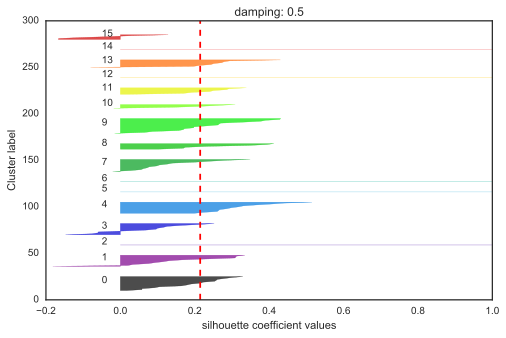

---------------------------------------------------

For damping = 0.51 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.52 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.53 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.54 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.55 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.56 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.57 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.58 average silhouette_score: 0.209953455204
---------------------------------------------------

For damping = 0.59 average silhouette_score

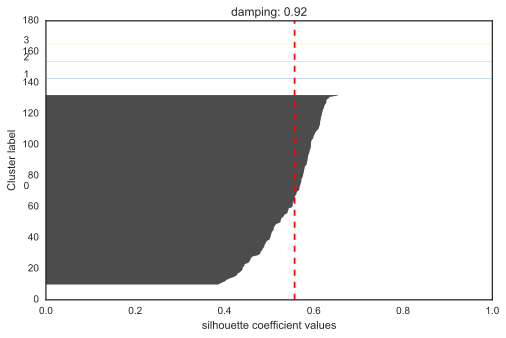

---------------------------------------------------

For damping = 0.93 average silhouette_score: 0.556995304807


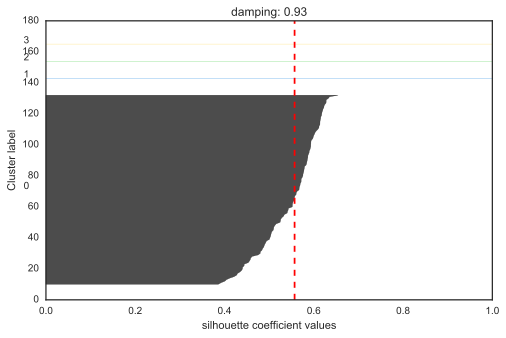

---------------------------------------------------

For damping = 0.94 average silhouette_score: 0.556995304807


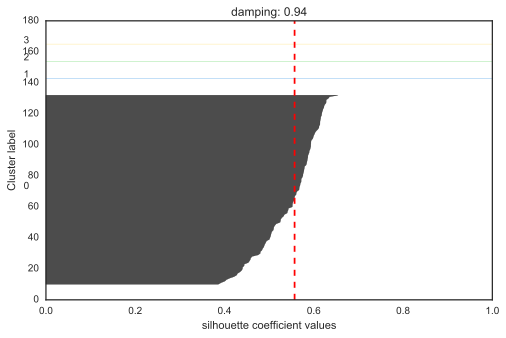

---------------------------------------------------

For damping = 0.95 average silhouette_score: 0.556995304807


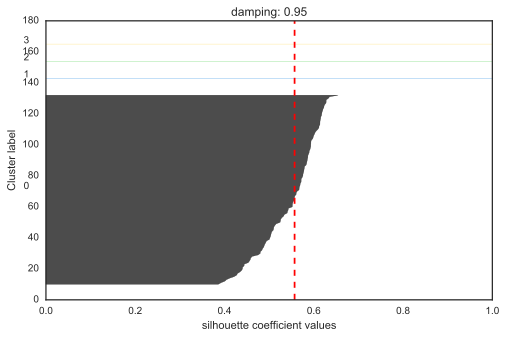

---------------------------------------------------

For damping = 0.96 average silhouette_score: 0.556995304807


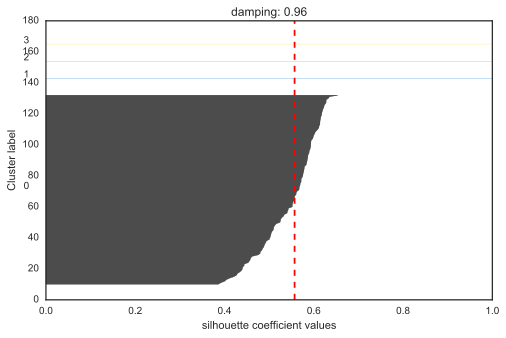

---------------------------------------------------

For damping = 0.97 average silhouette_score: 0.556995304807


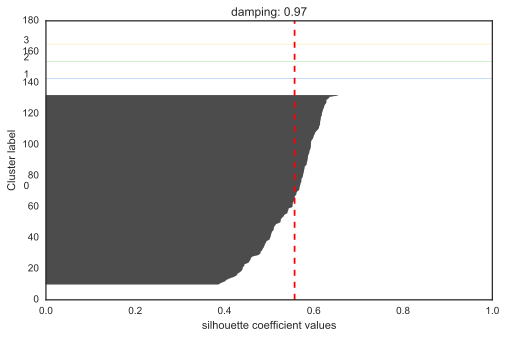

---------------------------------------------------

For damping = 0.98 average silhouette_score: 0.556995304807


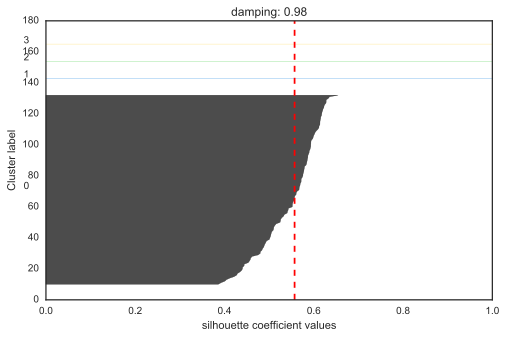

---------------------------------------------------

For damping = 0.99 average silhouette_score: 0.556995304807


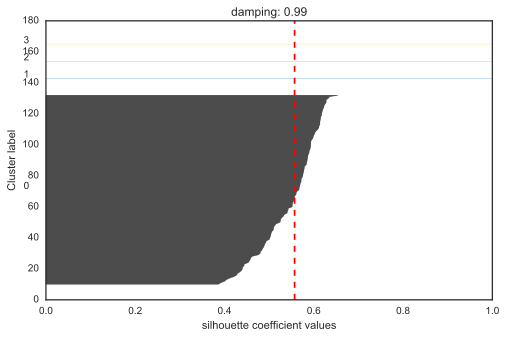

In [52]:
import matplotlib.cm as cm

#for ms in min_samples:
#    for e in eps:
for d in damping:
    
    clusterer = AffinityPropagation(damping=d)
    cluster_labels = clusterer.fit_predict(Xn)

    silhouette_avg = silhouette_score(Xn, cluster_labels)
    print '---------------------------------------------------\n'
    print "For damping =", d, "average silhouette_score:", silhouette_avg


    if silhouette_avg > 0.21:
        plt.figure(figsize=(8,5))
        sample_silhouette_values = silhouette_samples(Xn, cluster_labels)

        clusters = sorted(np.unique(cluster_labels))
        n_clusters = len(clusters)

        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("damping: "+str(d))
        plt.xlabel("silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")

        plt.show()

In [53]:
clusterer = KMeans(n_clusters=7)
cluster_labels = clusterer.fit_predict(Xn)

X_filled_loc = X_filled_agg.copy()
X_filled_loc['cluster'] = cluster_labels

map_osm = folium.Map(location=[X_filled_loc.lat.mean(), X_filled_loc.lon.mean()], zoom_start=4)

colors = ['blue','yellow','green','red','aqua','purple','black','grey','pink','brown',
          'lightblue','clouds','darkred','darkgreen','crimson','gold','teal','orange']

for i, clust in enumerate(np.unique(cluster_labels)):
    
    color = cm.spectral(float(i) / n_clusters)

    clust_df = X_filled_loc[X_filled_loc.cluster == clust]

    for x, y in zip(clust_df.lat, clust_df.lon):
        map_osm.simple_marker(location = [x,y], marker_color=colors[i])
    
map_osm.create_map(path='stations.html')
map_osm

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [124]:
f = open('X_filled_agg.save', 'wb')
cPickle.dump(X_filled_agg,f)
f.close()

---

### Find unique stations, match to cities:

In [55]:
weather_unique = bwm[['station','lon','lat']]

def fix_lon_lat(df):
    df['lon'] = df.lon.values[0]
    df['lat'] = df.lat.values[0]
    return df

weather_unique = weather_unique.groupby('station').apply(fix_lon_lat).reset_index(drop=True)

weather_unique.drop_duplicates(inplace=True)
print weather_unique.shape

(126, 3)


In [56]:
import geopy

In [57]:
locations['cart_key'] = 1
weather_unique['cart_key'] = 1

In [58]:
states_stations = locations.merge(weather_unique, on='cart_key')

In [59]:
states_stations.head()

,state_ct,latitude,longitude,cart_key,station,lon,lat
0,Acre,-9.30872154236,-70.4464645386,1,SBAA,-49.2833,-8.2500
1,Acre,-9.30872154236,-70.4464645386,1,SBAF,-43.3847,-22.8751
2,Acre,-9.30872154236,-70.4464645386,1,SBAN,-48.9643,-16.2292
3,Acre,-9.30872154236,-70.4464645386,1,SBAQ,-48.1330,-21.8120
4,Acre,-9.30872154236,-70.4464645386,1,SBAR,-37.0703,-10.9840


In [60]:
states_stations.drop(['cart_key'], axis=1, inplace=True)

In [61]:
states_stations.head()

,state_ct,latitude,longitude,station,lon,lat
0,Acre,-9.30872154236,-70.4464645386,SBAA,-49.2833,-8.2500
1,Acre,-9.30872154236,-70.4464645386,SBAF,-43.3847,-22.8751
2,Acre,-9.30872154236,-70.4464645386,SBAN,-48.9643,-16.2292
3,Acre,-9.30872154236,-70.4464645386,SBAQ,-48.1330,-21.8120
4,Acre,-9.30872154236,-70.4464645386,SBAR,-37.0703,-10.9840


In [62]:
from geopy.distance import vincenty

In [63]:
def distance_calculator(df):
    dist = (vincenty((df.latitude, df.longitude), (df.lat, df.lon)).km)/100.
    return dist

states_stations['dist_100km'] = states_stations.apply(distance_calculator, axis=1)


In [64]:
def decay_calculator(df):
    df['decayed_distance'] = 1./np.exp(df.dist_100km)
    return df

states_stations = states_stations.groupby('state_ct', as_index=False).apply(decay_calculator).reset_index(drop=True)


In [65]:
states_stations.head()

,state_ct,latitude,longitude,station,lon,lat,dist_100km,decayed_distance
0,Acre,-9.30872154236,-70.4464645386,SBAA,-49.2833,-8.2500,23.310464,7.523050e-11
1,Acre,-9.30872154236,-70.4464645386,SBAF,-43.3847,-22.8751,32.519051,7.536255e-15
2,Acre,-9.30872154236,-70.4464645386,SBAN,-48.9643,-16.2292,24.528590,2.225199e-11
3,Acre,-9.30872154236,-70.4464645386,SBAQ,-48.1330,-21.8120,27.585575,1.046494e-12
4,Acre,-9.30872154236,-70.4464645386,SBAR,-37.0703,-10.9840,36.605824,1.265589e-16


In [66]:
brazil_weather_daily.head()


,measurement_date,station,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti
0,2015-01-01,SBAF,-43.3847,-22.8751,87.275000,67.775000,56.084583,137.500000,5.458333,0.0,29.822917
1,2015-01-01,SBAN,-48.9643,-16.2292,74.975000,62.525000,66.695417,160.869565,4.125000,0.0,30.093750
2,2015-01-01,SBAQ,-48.1330,-21.8120,85.446154,70.907692,63.223077,180.769231,4.153846,0.0,29.990769
3,2015-01-01,SBAR,-37.0703,-10.9840,78.725000,70.113043,71.527391,110.000000,8.826087,0.0,29.948750
4,2015-01-01,SBAT,-56.1062,-9.8661,82.287500,73.850000,78.065625,85.000000,3.750000,0.0,28.059375


In [67]:
f = open('brazil_zika_wdates.p', 'rb')
brazil_zika = cPickle.load(f)
f.close()

In [68]:
state_stations_dist = states_stations[['state_ct','station','decayed_distance']]

In [69]:
brazil_zika[brazil_zika.state_city == 'Acre']

data_field,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
2016-02-13,Brazil,Acre,0,0,2016,2,13
2016-02-20,Brazil,Acre,0,0,2016,2,20
2016-02-27,Brazil,Acre,0,0,2016,2,27
2016-03-05,Brazil,Acre,0,0,2016,3,5
2016-03-12,Brazil,Acre,0,0,2016,3,12
2016-03-19,Brazil,Acre,0,0,2016,3,19
2016-03-26,Brazil,Acre,0,0,2016,3,26
2016-04-02,Brazil,Acre,1,0,2016,4,2
2016-04-09,Brazil,Acre,0,0,2016,4,9
2016-04-16,Brazil,Acre,0,0,2016,4,16


In [70]:
bz = brazil_zika.reset_index(drop=False)

In [71]:
bz.head()

data_field,index,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
0,2016-02-13,Brazil,Acre,0,0,2016,2,13
1,2016-02-13,Brazil,Sao Paulo,0,0,2016,2,13
2,2016-02-13,Brazil,Amazonas,0,0,2016,2,13
3,2016-02-13,Brazil,Espirito Santo,3,0,2016,2,13
4,2016-02-13,Brazil,Amapa,0,0,2016,2,13


In [72]:
bz.rename(columns={'index':'measurement_date'}, inplace=True)

In [73]:
bz.head()

data_field,measurement_date,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
0,2016-02-13,Brazil,Acre,0,0,2016,2,13
1,2016-02-13,Brazil,Sao Paulo,0,0,2016,2,13
2,2016-02-13,Brazil,Amazonas,0,0,2016,2,13
3,2016-02-13,Brazil,Espirito Santo,3,0,2016,2,13
4,2016-02-13,Brazil,Amapa,0,0,2016,2,13


In [74]:
bz.measurement_date = pd.to_datetime(bz.measurement_date)

In [75]:
bz[bz['state_city'] =='Acre']


data_field,measurement_date,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
0,2016-02-13,Brazil,Acre,0,0,2016,2,13
44,2016-02-20,Brazil,Acre,0,0,2016,2,20
67,2016-02-27,Brazil,Acre,0,0,2016,2,27
93,2016-03-05,Brazil,Acre,0,0,2016,3,5
134,2016-03-12,Brazil,Acre,0,0,2016,3,12
143,2016-03-19,Brazil,Acre,0,0,2016,3,19
175,2016-03-26,Brazil,Acre,0,0,2016,3,26
200,2016-04-02,Brazil,Acre,1,0,2016,4,2
241,2016-04-09,Brazil,Acre,0,0,2016,4,9
269,2016-04-16,Brazil,Acre,0,0,2016,4,16


In [76]:
bwm.index = bwm.measurement_date

In [77]:
bwm.reset_index(drop=True, inplace=True)
bwm.head()

,measurement_date,station,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2015-01-31,SBAA,-49.2833,-8.2500,86.951429,73.657143,66.875810,121.428571,3.757143,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-31,SBAF,-43.3847,-22.8751,84.161238,69.242799,64.075532,188.649733,5.326203,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-31,SBAN,-48.9643,-16.2292,74.661436,59.828191,63.479840,139.027963,5.339096,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-31,SBAQ,-48.1330,-21.8120,86.846787,67.777892,55.796684,140.572917,4.807792,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-31,SBAR,-37.0703,-10.9840,80.906434,69.598381,68.793104,113.516043,10.002674,0.0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
bwm.head(2).T

,0,1
measurement_date,2015-01-31 00:00:00,2015-01-31 00:00:00
station,SBAA,SBAF
lon,-49.2833,-43.3847
lat,-8.25,-22.8751
tmpf,86.9514,84.1612
dwpf,73.6571,69.2428
relh,66.8758,64.0755
drct,121.429,188.65
sknt,3.75714,5.3262
p01i,0,0


In [79]:
bwm.p01i.value_counts()

0.0    2200
Name: p01i, dtype: int64

In [80]:
bwm = bwm[['measurement_date', 'station','lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'alti']]

In [81]:
bwm.head(2).T

,0,1
measurement_date,2015-01-31 00:00:00,2015-01-31 00:00:00
station,SBAA,SBAF
lon,-49.2833,-43.3847
lat,-8.25,-22.8751
tmpf,86.9514,84.1612
dwpf,73.6571,69.2428
relh,66.8758,64.0755
drct,121.429,188.65
sknt,3.75714,5.3262
alti,29.7795,29.9071


In [82]:
def month_weather_expander(d):
    ndf = pd.DataFrame({'station':[d.station.values[0]]})
    for md in d.measurement_date:
        year = md.year
        month = md.month
        for col in [c for c in d.columns if not c in ['measurement_date','station']]:
            ndf['_'.join([str(year), str(month), col])] = d.ix[d.measurement_date == md, col].values[0]
    return ndf
    

bwm.sort_values(['station','measurement_date'], inplace=True, ascending=True)
bwm_wide = bwm.groupby('station').apply(month_weather_expander).reset_index(drop=True)

In [83]:
## Problem solved here
bwm_wide.head(2).T

,0,1
2015_10_alti,29.8656,29.9908
2015_10_drct,94.2986,157.201
2015_10_dwpf,69.8733,65.9417
2015_10_lat,-8.25,-22.8751
2015_10_lon,-49.2833,-43.3847
2015_10_relh,45.996,71.8329
2015_10_sknt,6.23077,5.27273
2015_10_tmpf,95.448,76.5546
2015_11_alti,29.8429,29.885
2015_11_drct,143.892,176.138


In [84]:
# bz[bz.state_city == 'Acre']

In [85]:
print bz.shape
print bwm_wide.shape

(459, 8)
(126, 145)


In [86]:
state_stations_dist.head()

,state_ct,station,decayed_distance
0,Acre,SBAA,7.523050e-11
1,Acre,SBAF,7.536255e-15
2,Acre,SBAN,2.225199e-11
3,Acre,SBAQ,1.046494e-12
4,Acre,SBAR,1.265589e-16


In [87]:
state_stations_dist.rename(columns={'state_ct':'state_city'}, inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [88]:
bz_stations = bz.merge(state_stations_dist, on='state_city')

In [89]:
bz_stations = bz_stations.merge(bwm_wide, on='station')

In [90]:
bz_stations.shape

(57834, 154)

In [91]:
# bz_stations[bz_stations.state_city == 'Acre']

In [92]:
measure_cols = [c for c in bz_stations.columns if c not in ['measurement_date', 'country',
                                                   'state_city','microcephaly_confirmed',
                                                   'microcephaly_fatal_confirmed',
                                                   'year','month','day','station',
                                                   'decayed_distance']]

for mc in measure_cols:
    bz_stations.loc[:, mc] = bz_stations.loc[:, mc] * bz_stations.decayed_distance

In [93]:
bz_stations.iloc[:,10:16].head()

data_field,2015_10_alti,2015_10_drct,2015_10_dwpf,2015_10_lat,2015_10_lon,2015_10_relh
0,2.246805e-09,7.094134e-09,5.256603e-09,-6.206516e-10,-3.707607e-09,3.460303e-09
1,2.246805e-09,7.094134e-09,5.256603e-09,-6.206516e-10,-3.707607e-09,3.460303e-09
2,2.246805e-09,7.094134e-09,5.256603e-09,-6.206516e-10,-3.707607e-09,3.460303e-09
3,2.246805e-09,7.094134e-09,5.256603e-09,-6.206516e-10,-3.707607e-09,3.460303e-09
4,2.246805e-09,7.094134e-09,5.256603e-09,-6.206516e-10,-3.707607e-09,3.460303e-09


In [94]:
bz_stations.drop(['decayed_distance','station'], axis=1, inplace=True)

groups = bz_stations.groupby(['measurement_date','country','state_city','microcephaly_confirmed',
                              'microcephaly_fatal_confirmed','year','month','day'])
bz_stations_wavg = groups.sum().reset_index()

In [95]:
bz_stations_wavg[bz_stations_wavg.state_city == 'Acre']

data_field,measurement_date,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day,2015_10_alti,2015_10_drct,...,2016_5_sknt,2016_5_tmpf,2016_6_alti,2016_6_drct,2016_6_dwpf,2016_6_lat,2016_6_lon,2016_6_relh,2016_6_sknt,2016_6_tmpf
0,2016-02-13,Brazil,Acre,0,0,2016,2,13,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
27,2016-02-20,Brazil,Acre,0,0,2016,2,20,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
54,2016-02-27,Brazil,Acre,0,0,2016,2,27,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
81,2016-03-05,Brazil,Acre,0,0,2016,3,5,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
108,2016-03-12,Brazil,Acre,0,0,2016,3,12,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
135,2016-03-19,Brazil,Acre,0,0,2016,3,19,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
162,2016-03-26,Brazil,Acre,0,0,2016,3,26,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
189,2016-04-02,Brazil,Acre,1,0,2016,4,2,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
216,2016-04-09,Brazil,Acre,0,0,2016,4,9,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938
243,2016-04-16,Brazil,Acre,0,0,2016,4,16,10.951089,74.465693,...,1.30653,29.521957,10.972981,71.426822,27.15158,-3.055309,-25.861634,30.280945,1.318962,29.458938


In [96]:
bz_stations_wavg.measurement_date.value_counts()

2016-04-23    27
2016-04-16    27
2016-05-21    27
2016-06-04    27
2016-02-20    27
2016-03-05    27
2016-03-19    27
2016-04-02    27
2016-04-30    27
2016-04-09    27
2016-05-14    27
2016-05-28    27
2016-02-13    27
2016-02-27    27
2016-03-12    27
2016-03-26    27
2016-05-07    27
Name: measurement_date, dtype: int64

In [97]:
bz_stations_wavg.measurement_date.unique()

array(['2016-02-12T16:00:00.000000000-0800',
       '2016-02-19T16:00:00.000000000-0800',
       '2016-02-26T16:00:00.000000000-0800',
       '2016-03-04T16:00:00.000000000-0800',
       '2016-03-11T16:00:00.000000000-0800',
       '2016-03-18T17:00:00.000000000-0700',
       '2016-03-25T17:00:00.000000000-0700',
       '2016-04-01T17:00:00.000000000-0700',
       '2016-04-08T17:00:00.000000000-0700',
       '2016-04-15T17:00:00.000000000-0700',
       '2016-04-22T17:00:00.000000000-0700',
       '2016-04-29T17:00:00.000000000-0700',
       '2016-05-06T17:00:00.000000000-0700',
       '2016-05-13T17:00:00.000000000-0700',
       '2016-05-20T17:00:00.000000000-0700',
       '2016-05-27T17:00:00.000000000-0700',
       '2016-06-03T17:00:00.000000000-0700'], dtype='datetime64[ns]')

In [98]:
f = open('brazil_zika_priormonths.p', 'wb')
cPickle.dump(bz_stations_wavg, f)
f.close()

In [99]:
bz_stations_wavg.columns

Index([u'measurement_date', u'country', u'state_city',
       u'microcephaly_confirmed', u'microcephaly_fatal_confirmed', u'year',
       u'month', u'day', u'2015_10_alti', u'2015_10_drct',
       ...
       u'2016_5_sknt', u'2016_5_tmpf', u'2016_6_alti', u'2016_6_drct',
       u'2016_6_dwpf', u'2016_6_lat', u'2016_6_lon', u'2016_6_relh',
       u'2016_6_sknt', u'2016_6_tmpf'],
      dtype='object', name=u'data_field', length=152)

In [100]:
def zika_measurement_expander(d):
    ndf = pd.DataFrame({'state_city':[d.state_city.values[0]]})
    
    for month in d.month.unique():
        ndf['_'.join(['zika_micro',str(month)])] = np.sum(d[d.month == month].microcephaly_confirmed)
        ndf['_'.join(['zika_micro_fatal',str(month)])] = np.sum(d[d.month == month].microcephaly_fatal_confirmed)
    
    dsingle = d.iloc[[0],:]
    dsingle = ndf.merge(dsingle, on='state_city')
    dsingle.drop(['microcephaly_confirmed','microcephaly_fatal_confirmed',
                  'measurement_date','year','month','day'], axis=1)
    return dsingle
    

bz_stations_cityrow = bz_stations_wavg.groupby(['state_city']).apply(zika_measurement_expander).reset_index(drop=True)

In [101]:
bz_stations_cityrow.ix[bz_stations_cityrow.state_city == 'Acre',0:20]

,state_city,zika_micro_2,zika_micro_fatal_2,zika_micro_3,zika_micro_fatal_3,zika_micro_4,zika_micro_fatal_4,zika_micro_5,zika_micro_fatal_5,zika_micro_6,zika_micro_fatal_6,measurement_date,country,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day,2015_10_alti,2015_10_drct
0,Acre,0,0,0,0,1,0,0,0,0,0,2016-02-13,Brazil,0,0,2016,2,13,10.951089,74.465693


In [102]:
print bz_stations_cityrow.shape
bz_stations_cityrow.head()

(27, 162)


,state_city,zika_micro_2,zika_micro_fatal_2,zika_micro_3,zika_micro_fatal_3,zika_micro_4,zika_micro_fatal_4,zika_micro_5,zika_micro_fatal_5,zika_micro_6,...,2016_5_sknt,2016_5_tmpf,2016_6_alti,2016_6_drct,2016_6_dwpf,2016_6_lat,2016_6_lon,2016_6_relh,2016_6_sknt,2016_6_tmpf
0,Acre,0,0,0,0,1,0,0,0,0,...,1.306530,29.521957,10.972981,71.426822,27.151580,-3.055309,-25.861634,30.280945,1.318962,29.458938
1,Alagoas,80,6,156,11,278,15,271,9,73,...,6.678984,82.383271,31.031851,135.994554,73.797923,-9.623057,-37.831771,82.387582,5.923150,82.099532
2,Amapa,0,0,0,0,18,0,25,0,7,...,1.492575,20.846074,9.497927,33.831256,24.481022,0.161367,-16.389726,24.264270,1.577787,27.059839
3,Amazonas,0,0,1,0,15,0,16,0,4,...,1.182924,37.513674,13.387064,51.120406,34.508489,-1.569415,-28.905855,35.241412,0.979909,37.985975
4,Bahia,363,0,702,0,1069,3,976,3,252,...,4.243266,75.054915,27.383353,123.449498,57.429006,-11.667889,-37.746551,44.782372,3.474037,78.482893


In [103]:
bz_stations_cityrow.head(2).T

,0,1
state_city,Acre,Alagoas
zika_micro_2,0,80
zika_micro_fatal_2,0,6
zika_micro_3,0,156
zika_micro_fatal_3,0,11
zika_micro_4,1,278
zika_micro_fatal_4,0,15
zika_micro_5,0,271
zika_micro_fatal_5,0,9
zika_micro_6,0,73


In [104]:
f = open('brazil_zika_cityrow_weather.p', 'wb')
cPickle.dump(bz_stations_cityrow, f)
f.close()

In [105]:
## Saving data file
f= open('bz_stations_cityrow.save', 'wb')
cPickle.dump(bz_stations_cityrow,f)
f.close()

In [106]:
#########################
## Final Data Set
########################

bz_stations_cityrow.shape

(27, 162)

In [107]:
bz_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57834 entries, 0 to 57833
Columns: 152 entries, measurement_date to 2016_6_tmpf
dtypes: datetime64[ns](1), float64(144), int32(3), int64(2), object(2)
memory usage: 66.8+ MB


In [108]:
bz_stations_cityrow[['state_city','zika_micro_fatal_2','zika_micro_fatal_3','zika_micro_fatal_4','zika_micro_fatal_5',
                     'zika_micro_fatal_6','microcephaly_confirmed' ]]

,state_city,zika_micro_fatal_2,zika_micro_fatal_3,zika_micro_fatal_4,zika_micro_fatal_5,zika_micro_fatal_6,microcephaly_confirmed
0,Acre,0,0,0,0,0,0
1,Alagoas,6,11,15,9,3,25
2,Amapa,0,0,0,0,0,0
3,Amazonas,0,0,0,0,0,0
4,Bahia,0,0,3,3,1,107
5,Ceara,30,52,71,48,18,24
6,Distrito Federal,0,0,5,3,1,0
7,Espirito Santo,0,2,5,7,3,3
8,Goias,0,0,0,0,0,6
9,Maranhao,0,0,0,0,0,0


In [109]:
# bz_stations_cityrow.columns.tolist()

In [110]:
# def weight_month_records(df):
    
#     measure_cols = [c for c in df.columns if c not in ['measurement_date', 'country',
#                                                        'state_city','microcephaly_confirmed',
#                                                        'microcephaly_fatal_confirmed',
#                                                        'year','month','day','station',
#                                                        'decayed_distance']]
    
#     df_ = df[['microcephaly_confirmed','microcephaly_fatal_confirmed','year','month','day']]
#     df_ = df_.iloc[0,:]
    
#     norm_dist = df.decayed_distance.values / np.sum(df.decayed_distance.values)
    
#     for col in ['tmpf','dwpf','relh','drct','sknt','p01i','alti']:
#         df_[col+'_wavg'] = np.sum(df[col].values * norm_dist)
    
#     return df_


# bz_dist_weighted = bz_dist.groupby(['state_city']).apply(aggregate_bz).reset_index() 

In [111]:
# bz_dist = bz.merge(state_stations_dist, on=['state_city','station'])

In [112]:
# bz_dist.shape

In [113]:
# bz_dist.head()

In [114]:
# def aggregate_bz(df):
    
#     df_ = df[['microcephaly_confirmed','microcephaly_fatal_confirmed','year','month','day']]
#     df_ = df_.iloc[0,:]
    
#     norm_dist = df.decayed_distance.values / np.sum(df.decayed_distance.values)
    
#     for col in ['tmpf','dwpf','relh','drct','sknt','p01i','alti']:
#         df_[col+'_wavg'] = np.sum(df[col].values * norm_dist)
    
#     return df_


# bz_dist_weighted = bz_dist.groupby(['measurement_date','country','state_city']).apply(aggregate_bz).reset_index() 

In [115]:
# bz_dist_weighted.head()

In [116]:
# bz_dist_weighted.shape

In [117]:
# f = open('brazil_zika_weighted_avg_weather.p', 'wb')
# cPickle.dump(bz_dist_weighted, f)
# f.close()

In [118]:
# print bz_dist_weighted.memory_usage().sum()
# print "============================\n"
# print bz_dist_weighted.memory_usage()

In [119]:
# bz_dist_weighted.info()

In [120]:
# bz_dist_weighted.measurement_date.value_counts()

### Damns

In [121]:
# from geopy.geocoders import Bing
# # location =
# geolocator  = Bing("AqbMqgChvhrcKHPnavY2dmbyTP9L7XQG1iKCnZ61KXFOwcZbMABDNlyNnFnYGJvY")
# location = geolocator.geocode("Araguaia - Tocantins  Brazil")
# location

In [122]:
# Location((-22.3844509125, -42.9548301697, 0.0))